PROJECT 1 PROPOSAL LEVEL 1

DATA ANALYTICS 

Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

1. Data Loading and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df = pd.read_csv('sales.csv') 
print("\nDataset shape:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

C:\Users\avinash\AppData\Local\Temp\ipykernel_45512\372341096.py:14: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales.csv')



Dataset shape: (19454838, 13)

Columns in dataset: ['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price', 'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2', 'promo_discount_2', 'promo_discount_type_2']


In [3]:
print(df.head())

  product_id store_id        date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2 promo_discount_type_2  
0         NaN         PR03         NaN               NaN                   NaN  
1         NaN         PR03         NaN               NaN                   NaN  
2         NaN         PR03         NaN               NaN                   NaN  
3         NaN         PR03         NaN               NaN                   NaN  
4         NaN         PR03         NaN               NaN                   NaN  


In [4]:
print(df.dtypes)

product_id                object
store_id                  object
date                      object
sales                    float64
revenue                  float64
stock                    float64
price                    float64
promo_type_1              object
promo_bin_1               object
promo_type_2              object
promo_bin_2               object
promo_discount_2         float64
promo_discount_type_2     object
dtype: object


In [5]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [6]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed")

df['date'] = pd.to_datetime(df['date'])

numeric_columns = ['sales', 'revenue', 'stock', 'price', 'promo_discount_2']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical_columns = ['promo_type_1', 'promo_type_2', 'promo_bin_1', 'promo_bin_2']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [7]:
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Missing values in each column:
product_id                      0
store_id                        0
date                            0
sales                     1190762
revenue                   1190762
stock                     1190762
price                      571981
promo_type_1                    0
promo_bin_1              16803149
promo_type_2                    0
promo_bin_2              19395757
promo_discount_2         19395757
promo_discount_type_2    19395757
dtype: int64

Percentage of missing values in each column:
product_id                0.000000
store_id                  0.000000
date                      0.000000
sales                     6.120647
revenue                   6.120647
stock                     6.120647
price                     2.940045
promo_type_1              0.000000
promo_bin_1              86.370028
promo_type_2              0.000000
promo_bin_2              99.696317
promo_discount_2         99.696317
promo_discount_type_2    99.696317
dtype: float

2. Descriptive Statistics

In [8]:
df['sales'] = df['sales'].fillna(0)
df['revenue'] = df['revenue'].fillna(0)
df['stock'] = df['stock'].fillna(0)
df['price'] = df['price'].fillna(df['price'].mean())
df['promo_discount_2'] = df['promo_discount_2'].fillna(0)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['profit_margin'] = (df['revenue'] - (df['price'] * df['sales'])) / df['revenue'] * 100

print("\nDescriptive Statistics:")
print(df[numeric_columns].describe())


Descriptive Statistics:
              sales       revenue         stock         price  \
count  1.945484e+07  1.945484e+07  1.945484e+07  1.945484e+07   
mean   4.094923e-01  1.937833e+00  1.490900e+01  1.558334e+01   
std    1.420819e+01  3.865864e+01  3.632124e+01  3.181780e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e-02   
25%    0.000000e+00  0.000000e+00  3.000000e+00  3.500000e+00   
50%    0.000000e+00  0.000000e+00  8.000000e+00  8.500000e+00   
75%    0.000000e+00  0.000000e+00  1.600000e+01  1.690000e+01   
max    4.330100e+04  8.419796e+04  4.716000e+03  1.599000e+03   

       promo_discount_2  
count      1.945484e+07  
mean       7.748921e-02  
std        1.530687e+00  
min        0.000000e+00  
25%        0.000000e+00  
50%        0.000000e+00  
75%        0.000000e+00  
max        5.000000e+01  


3. Time Series Analysis

In [10]:
daily_sales = df.groupby('date')[['sales', 'revenue']].sum().reset_index()
daily_sales['sales_ma7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['sales_ma30'] = daily_sales['sales'].rolling(window=30).mean()

In [11]:
monthly_sales = df.groupby(['year', 'month'])[['sales', 'revenue']].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(DAY=1))

In [12]:
print("\nPromotion Type 1 Impact:")
promo1_analysis = df.groupby('promo_type_1')[['sales', 'revenue', 'profit_margin']].agg({'sales': 'mean','revenue': 'mean','profit_margin': 'mean'}).round(2)
print(promo1_analysis)


Promotion Type 1 Impact:


C:\Users\avinash\AppData\Local\Temp\ipykernel_45512\438224761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo1_analysis = df.groupby('promo_type_1')[['sales', 'revenue', 'profit_margin']].agg({'sales': 'mean','revenue': 'mean','profit_margin': 'mean'}).round(2)


              sales  revenue  profit_margin
promo_type_1                               
PR01           0.42     4.58         -17.81
PR03           0.89     6.28           -inf
PR04           0.04     4.95         -18.00
PR05           0.33     2.66           -inf
PR06           0.28     2.07           -inf
PR07           0.95     3.76           -inf
PR08           0.50     5.94         -81.48
PR09           0.83     4.95           -inf
PR10           0.52     3.43           -inf
PR11           1.08     1.34          -7.96
PR12           0.68     3.11           -inf
PR13           0.65    13.01         -10.10
PR14           0.39     1.66           -inf
PR15           0.79    23.90         -32.06
PR16          20.25   476.53         -13.23
PR17           0.38     2.23           -inf
PR18           0.87     5.24         -17.68


4. Customer and Product Analysis

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid") 

fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

(array([17167., 17287., 17410., 17532., 17652., 17775., 17897., 18017.,
        18140., 18262.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01')])

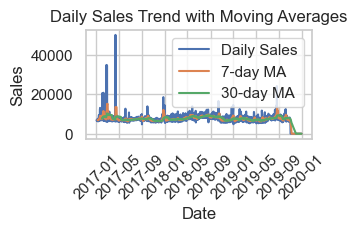

In [15]:
plt.subplot(3, 2, 1)
sns.lineplot(data=daily_sales, x='date', y='sales', label='Daily Sales')
sns.lineplot(data=daily_sales, x='date', y='sales_ma7', label='7-day MA')
sns.lineplot(data=daily_sales, x='date', y='sales_ma30', label='30-day MA')
plt.title('Daily Sales Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)

Text(0, 0.5, 'Sales')

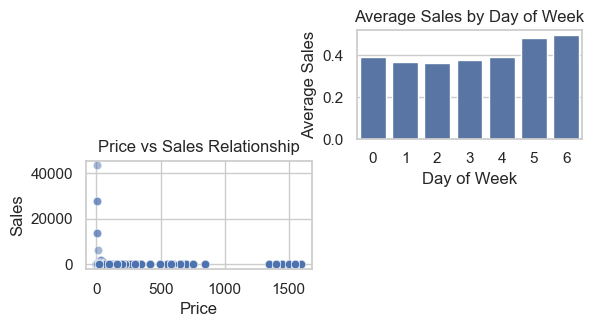

In [19]:
plt.subplot(3, 2, 2)
dow_sales = df.groupby('day_of_week')['sales'].mean()
sns.barplot(x=dow_sales.index, y=dow_sales.values)
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')

plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x='price', y='sales', alpha=0.5)
plt.title('Price vs Sales Relationship')
plt.xlabel('Price')
plt.ylabel('Sales')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'PR01'),
  Text(1, 0, 'PR03'),
  Text(2, 0, 'PR04'),
  Text(3, 0, 'PR05'),
  Text(4, 0, 'PR06'),
  Text(5, 0, 'PR07'),
  Text(6, 0, 'PR08'),
  Text(7, 0, 'PR09'),
  Text(8, 0, 'PR10'),
  Text(9, 0, 'PR11'),
  Text(10, 0, 'PR12'),
  Text(11, 0, 'PR13'),
  Text(12, 0, 'PR14'),
  Text(13, 0, 'PR15'),
  Text(14, 0, 'PR16'),
  Text(15, 0, 'PR17'),
  Text(16, 0, 'PR18')])

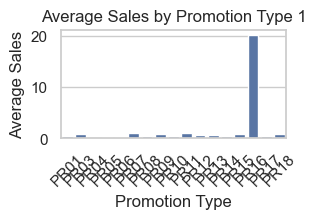

In [20]:
plt.subplot(3, 2, 4)
sns.barplot(data=promo1_analysis.reset_index(), x='promo_type_1', y='sales')
plt.title('Average Sales by Promotion Type 1')
plt.xlabel('Promotion Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

5. Visualizations and Recommendations

C:\Users\avinash\AppData\Local\Temp\ipykernel_45512\3398126160.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  stock_sales_pivot = df.pivot_table(index='store_id',columns=pd.qcut(df['stock'], 5),values='sales',aggfunc='mean')


Text(0.5, 1.0, 'Stock vs Sales Heatmap by Store')

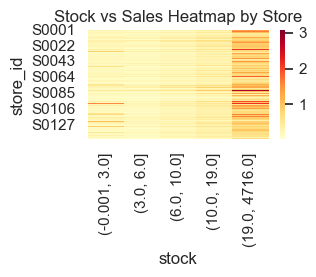

In [21]:
plt.subplot(3, 2, 5)
stock_sales_pivot = df.pivot_table(index='store_id',columns=pd.qcut(df['stock'], 5),values='sales',aggfunc='mean')
sns.heatmap(stock_sales_pivot, cmap='YlOrRd')
plt.title('Stock vs Sales Heatmap by Store')

(array([17167., 17287., 17410., 17532., 17652., 17775., 17897., 18017.,
        18140., 18262.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01')])

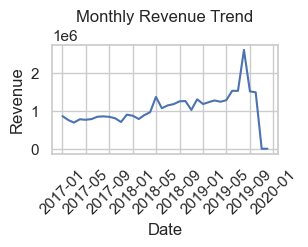

In [22]:
plt.subplot(3, 2, 6)
sns.lineplot(data=monthly_sales, x='date', y='revenue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

In [23]:
plt.tight_layout()

plt.show()

plt.savefig('retail_analysis.png')
print("\nVisualizations have been saved as 'retail_analysis.png'")

<Figure size 640x480 with 0 Axes>


Visualizations have been saved as 'retail_analysis.png'


<Figure size 640x480 with 0 Axes>